<details><summary style="display:list-item; font-size:16px; color:blue;">Jupyter Help</summary>
    
In each cell:
    
1. Add your solution to the cell section with `## YOUR SOLUTION HERE ## `.
2. Run the cell by selecting the `Run` button or the `Shift`+`Enter` keys.
3. Save your work by selecting the `Save` button, the `command`+`s` keys (Mac), or `control`+`s` keys (Windows).

![Screenshot of the buttons at the top of a Jupyter Notebook. The Run and Save buttons are highlighted](https://static-assets.codecademy.com/Paths/ds-python/jupyter-buttons.png)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

**Dataset - Hotel Booking Reservations**

Import the [Hotel Booking Reservations](https://www.sciencedirect.com/science/article/pii/S2352340918315191) dataset contained in the CSV file `'datasets/H1.csv'` into a pandas DataFrame named `hotels`. 

Preview the first five rows using the `.head()` method.

<details><summary style="display:list-item; font-size:16px; color:blue;">Here's a quick summary of the columns</summary>
     
- **IsCanceled**: indicates if the booking was canceled (**1**) or not (**0**)
- **LeadTime**: Number of days between booking date and arrival date
- **ArrivalDateYear**: Year of arrival date
- **ArrivalDateMonth**: Month of arrival date
- **ArrivalDateWeekNumber**: Week number of arrival date
- **ArrivalDateDayOfMonth**: Day of the month of arrival date
- **StaysInWeekendNights**: Number of weekend nights booked (Sat-Sun)
- **StaysInWeekNights**: Number of weekday nights booked (Mon-Fri)
- **Adults**: Number of adults
- **Children**: Number of children
- **Babies**: Number of babies
- **Meal**: Type of meal booked (Undefined/SC, BB, HB, or FB)
- **Country**: Country of origin of the booker
- **MarketSegment**: Market segment (TA - travel agent, TO - tour operators)
- **DistributionChannel**: Booking distribution channel (TA - travel agent, TO - tour operators)
- **IsRepeatedGuest**: 1 indicates a repeated guest else 0
- **PreviousCancellations**: The number of previous bookings canceled by the customer
- **PreviousBookingsNotCanceled**: The number of previous bookings not canceled by the customer
- **ReservedRoomType**: Room type reserved
- **AssignedRoomType**: Type of assigned room booked
- **BookingChanges**: Number of booking changes or modifications
- **DepositType**: Type of deposit to guarantee booking (No Deposit, Non Refund, or Refundable)
- **Agent**: ID of the travel agency that made the booking
- **Company**: ID of the company that made the booking
- **DaysInWaitingList**: Number of days booking waws waitlisted before confirmation
- **CustomerType**: The customer type of booking (Contract, Group, Transient, or Transient-party)
- **ADR**: the average daily rate 
- **RequiredCarParkingSpaces**: Number of parking spaces requested by the customer
- **TotalOfSpecialRequests**: Number of special requests by the customer
- **ReservationStatus**: The last reservation status (Canceled, Check-Out, No-Show)
- **ReservationStatusDate**: The date of the last reservation status

In [2]:
hotels = pd.read_csv('datasets/H1.csv')
hotels.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Example: Percent of Cancellations by Total Number of Special Requests**

The cell below has the code from the narrative example. 

How do you think the AI did? Are there other revisions you might want the AI to make?

One idea would be to reset the index and name the columns with more human-friendly names (for example "cancellation percentage").

In [7]:
cancellation_percentage = hotels.groupby('TotalOfSpecialRequests')['IsCanceled'].mean() * 100
cancellation_percentage = cancellation_percentage.sort_index()

# Display the DataFrame
print(cancellation_percentage)

TotalOfSpecialRequests
0    32.270471
1    21.997290
2    23.347835
3    18.241758
4    10.563380
5     7.142857
Name: IsCanceled, dtype: float64


**Analysis**
    
The large language model successfully generated Python code that restructured the dataset as requested. Interestingly, we see that the percentage of cancellations generally decreases as the number of special requests increases. Perhaps people making many special requests have put more work into arranging their trip, and so are less likely to cancel. Of course, that's only a guess, and we'd need more sophisticated analysis to know for sure.

Remember that LLMs work probabilistically: no matter how well-engineered a prompt is, there will be random variations in the response. We should always expect to do some work refining the code we receive from an LLM.

**Checkpoint 1 / 2: Percentage of Cancellations By Month**

Write a prompt that produces a table containing the percentage of cancellations by the booking's arrival month. 

The relevant columns include:
- `IsCanceled` indicates if the booking was canceled (**1**) or not (**0**)
- `ArrivalDateMonth` indicates the month of the arrival date

Sort the table by month in chronological order from January to December.

Hint: first we need to restructure the dataset by grouping the bookings by month and then calculate the cancellation percentages by month.

Copy and paste the Python code from the LLM output in the cell below. Does it correctly produce a table containing the percentage of cancellations by month? If not, try going back and improving your prompt, or modify the code from your original prompt as necessary.

What do you notice about the cancellation statuses by arrival month? Is there a seasonal trend?

In [12]:
# Define month order for sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Grouping by ArrivalDateMonth and calculating cancellation percentage
cancellation_percentage = hotels.groupby('ArrivalDateMonth')['IsCanceled'].mean() * 100

# Sorting the resulting dataframe by month
cancellation_percentage = cancellation_percentage.reindex(index=month_order)

cancellation_percentage


ArrivalDateMonth
January      14.819881
February     25.620367
March        22.871703
April        29.343308
May          28.772127
June         33.070608
July         31.401706
August       33.449121
September    32.368082
October      27.510549
November     18.916701
December     23.829305
Name: IsCanceled, dtype: float64

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>
   
```
Starting with the pandas DataFrame `hotels`, use the binary `IsCanceled` column to compute the percentage of cancellations corresponding to each arrival month in the column `ArrivalDateMonth`. Sort the resulting dataframe by month from January to December.
```

</details>
<br>
<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>

Certainly! You can achieve this by grouping the data by the `ArrivalDateMonth` and then calculating the percentage of cancellations for each month. Finally, you can sort the resulting DataFrame based on the month.

Here's an example code snippet to help you accomplish this task:

```python
# Grouping by ArrivalDateMonth and calculating cancellation percentage
cancellation_percentage = hotels.groupby('ArrivalDateMonth')['IsCanceled'].mean() * 100

# Sorting the resulting dataframe by month
cancellation_percentage = cancellation_percentage.reindex(index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

cancellation_percentage
```

Make sure to replace `hotels` with the actual name of your DataFrame containing the hotel data. This code will provide you with the percentage of cancellations for each month sorted from January to December.

</details>

**Analysis**

It looks like the percentage of cancellations follows a roughly seasonal pattern: high in the summer and low in the winter (with some variation).

**Checkpoint 2 / 2: Compare Average Lead Time to Cancellation Percentage**

Let's now perform a more complex task by investigating the total number of cancellations by the _average lead time_ for each arrival month.

The relevant columns include:
- `IsCanceled` indicates if the booking was canceled (**1**) or not (**0**)
- `ArrivalDateMonth` indicates the month of the arrival date
- `LeadTime` is the number of days between the booking and arrival dates

Write a prompt to produce a scatterplot of the average lead time for each month (x-axis) against the percentage of cancellations for that month (y-axis). 

**Extra challenge**: try adding a best-fit regression line and calculate the correlation coefficient. 

Copy and paste the Python code from the AI in the cell below. Does it correctly produce a scatterplot plotting the average monthly lead time against the percentage of cancellations by month? If not, try going back and improving your prompt, or modify the code from your original prompt as necessary.

What do you notice about the trend? Does higher or lower average monthly lead time correlate to higher or lower cancellation percentages?

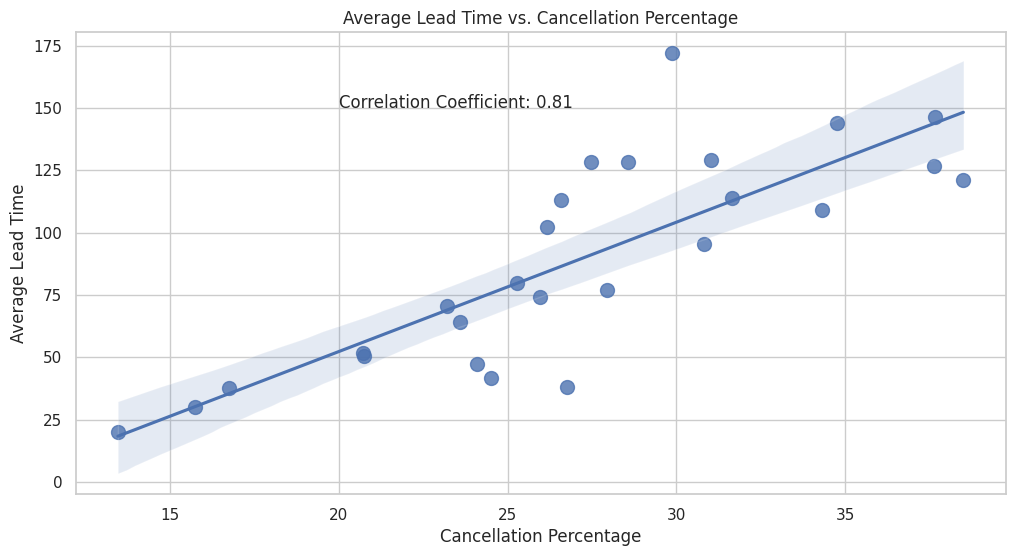

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Assuming 'hotels' is the pandas DataFrame with the relevant columns

# Calculate cancellation percentage for each month
cancellation_percentage = hotels.groupby(['ArrivalDateYear', 'ArrivalDateMonth'])['IsCanceled'].mean() * 100
cancellation_df = cancellation_percentage.reset_index()

# Calculate average lead time for each month and year
avg_lead_time = hotels.groupby(['ArrivalDateYear', 'ArrivalDateMonth'])['LeadTime'].mean()
avg_lead_time_df = avg_lead_time.reset_index()

# Merge the two dataframes
merged_df = pd.merge(avg_lead_time_df, cancellation_df, on=['ArrivalDateYear', 'ArrivalDateMonth'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.regplot(x='IsCanceled', y='LeadTime', data=merged_df, scatter_kws={'s': 100})

# Fit the regression line and calculate correlation coefficient
X = merged_df['IsCanceled'].values.reshape(-1, 1)
y = merged_df['LeadTime'].values
model = LinearRegression()
model.fit(X, y)
xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

correlation_coef, _ = pearsonr(merged_df['IsCanceled'], merged_df['LeadTime'])
plt.text(20, 150, f'Correlation Coefficient: {correlation_coef:.2f}', fontsize=12)

plt.title('Average Lead Time vs. Cancellation Percentage')
plt.xlabel('Cancellation Percentage')
plt.ylabel('Average Lead Time')
plt.show()

<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see our example prompt:</summary>

    
Because there are so many steps going on, we've created a very detailed prompt. But you could also achieve the same results with more open-ended prompts followed by requests for revisions.
    
```
Generate Python code to restructure a pandas DataFrame and create a figure using Seaborn.
We've imported our dataset to the DataFrame `hotels` which has the relevant columns:
- `IsCanceled" indicates the cancellation status
- `ArrivalDateMonth` indicates the month of the arrival date
- `LeadTime` is the number of days from the booking date to the arrival date
Create a scatterplot that plots the average lead time for each `ArrivalDateMonth` and `ArrivalDateYear` 
against the percentage of cancellations for that month.
Include the best-fit regression line in the plot and compute the correlation coefficient.
```

</details>
<br>
<details><summary style="display:list-item; font-size:16px; color:blue;">Click here to see the generated response:</summary>

Here's the Python code to achieve what you described using pandas and Seaborn:

```py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported your dataset into the pandas DataFrame 'hotels'

# Calculating the percentage of cancellations for each month
cancellation_percentage = hotels.groupby(['ArrivalDateMonth', 'IsCanceled']).size().unstack(fill_value=0)
cancellation_percentage['Total'] = cancellation_percentage.sum(axis=1)
cancellation_percentage['CancellationPercentage'] = (cancellation_percentage[1] / cancellation_percentage['Total']) * 100

# Calculating the average lead time for each month
average_lead_time = hotels.groupby('ArrivalDateMonth')['LeadTime'].mean().reset_index()

# Merging the two dataframes on 'ArrivalDateMonth'
merged_df = pd.merge(average_lead_time, cancellation_percentage, on='ArrivalDateMonth')

# Plotting the scatterplot with regression line
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='CancellationPercentage', y='LeadTime', hue='ArrivalDateMonth', palette='viridis')
sns.regplot(data=merged_df, x='CancellationPercentage', y='LeadTime', scatter=False, color='black')
plt.title('Average Lead Time vs. Cancellation Percentage by Month')
plt.xlabel('Cancellation Percentage')
plt.ylabel('Average Lead Time')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Calculating and printing correlation coefficient
correlation_coefficient = merged_df['CancellationPercentage'].corr(merged_df['LeadTime'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Show plot
plt.show()
```
<br>
This code performs the following steps:

1. Calculates the percentage of cancellations for each month.
2. Calculates the average lead time for each month.
3. Merges the two dataframes on the 'ArrivalDateMonth'.
4. Plots a scatterplot with the percentage of cancellations on the x-axis and the average lead time on the y-axis, with different colors for each month.
5. Adds a regression line to the plot.
6. Calculates and prints the correlation coefficient between cancellation percentage and lead time.
7. Displays the plot.
8. Make sure to replace 'IsCanceled', 'ArrivalDateMonth', and 'LeadTime' with the actual column names from your dataset if they are different. Also, adjust the palette parameter in the sns.scatterplot function call to change the color palette if desired.

</details>

**Analysis**

It looks like September has the highest average lead time (157.7 days) followed by June (138.4 days) and May (121.1 days). The months with the lowest average lead time are January (26.1 days), February (39.9 days), and November (45.4 days). 

The months with the highest cancellation percentages are August (33.4%), June (33.0%), and September (32.4%). The months with the lowest cancellation percentages are January (14.8%), November (18.9%), and March (22.9%).
- Note: the exact numbers are contained in the DataFrame `merged_df` generated by the LLM!

The strongly positive correlation coefficient of 0.85 suggests that as the average monthly lead time increases, the cancellation percentage tends to increase as well, _and vice versa_ (remember correlation does not equal causation!).


Correlation Coefficient: 0.8458754806406874


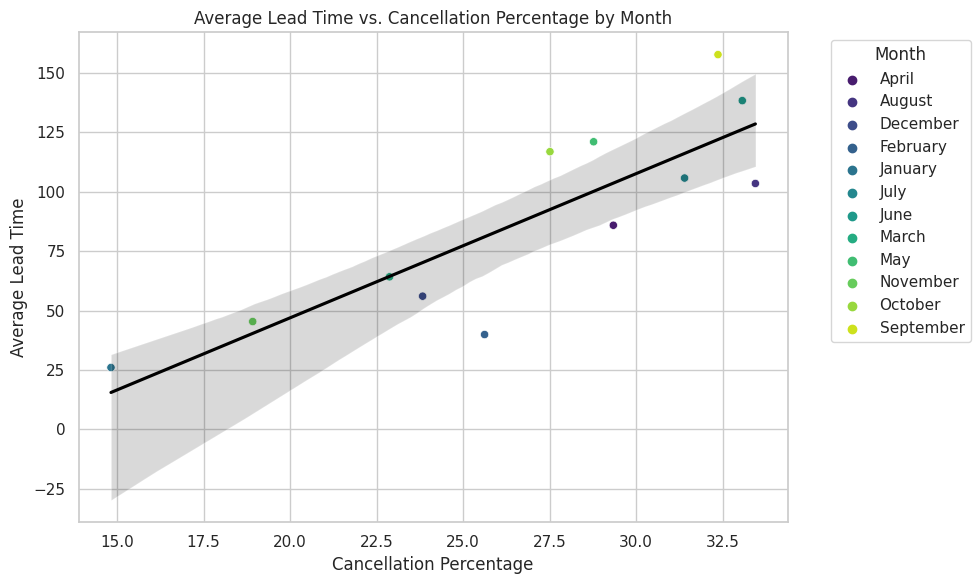

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported your dataset into the pandas DataFrame 'hotels'

# Calculating the percentage of cancellations for each month
cancellation_percentage = hotels.groupby(['ArrivalDateMonth', 'IsCanceled']).size().unstack(fill_value=0)
cancellation_percentage['Total'] = cancellation_percentage.sum(axis=1)
cancellation_percentage['CancellationPercentage'] = (cancellation_percentage[1] / cancellation_percentage['Total']) * 100

# Calculating the average lead time for each month
average_lead_time = hotels.groupby('ArrivalDateMonth')['LeadTime'].mean().reset_index()

# Merging the two dataframes on 'ArrivalDateMonth'
merged_df = pd.merge(average_lead_time, cancellation_percentage, on='ArrivalDateMonth')

# Plotting the scatterplot with regression line
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='CancellationPercentage', y='LeadTime', hue='ArrivalDateMonth', palette='viridis')
sns.regplot(data=merged_df, x='CancellationPercentage', y='LeadTime', scatter=False, color='black')
plt.title('Average Lead Time vs. Cancellation Percentage by Month')
plt.xlabel('Cancellation Percentage')
plt.ylabel('Average Lead Time')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Calculating and printing correlation coefficient
correlation_coefficient = merged_df['CancellationPercentage'].corr(merged_df['LeadTime'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Show plot
plt.show()